<a href="https://colab.research.google.com/github/bahadirbesirkestane/Staj/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Zaman Serisi Analizi**
Prophet kütüphanesini kullanarak, aylık araba satış veri setinden araba satış tahmini.

Veri seti linki https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv

In [2]:
import pandas as pd

In [6]:
df=pd.read_csv("/content/master_monthly-car-sales.csv")
df.shape

(108, 2)

In [7]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


### **Veriyi Görselleştirme**

>Veride mevsimsellik, aykırı değerler vb. gibi kriterlerin olup olmadığını incelemek gerekiyor.

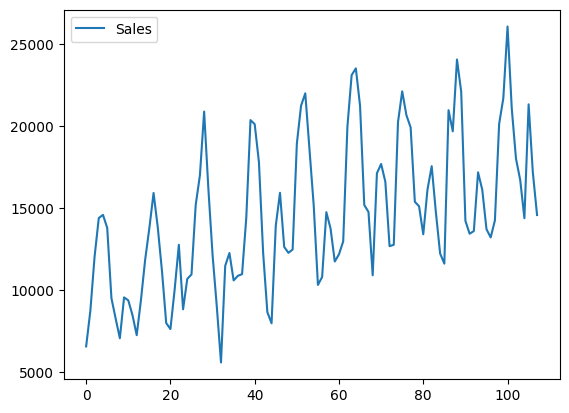

In [9]:
from matplotlib import pyplot

df.plot()
pyplot.show()

**Veri Tipi Kontrolü**

>Kullanılan kütüphaneye göre sütun isimlerinde ilk sütüun ds adında olmalo ve tarih tutmalı. İkinci sütun y adında olmalı ve gözlemleri içermelidir.

In [10]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [11]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [12]:
df.columns=["ds","y"]
df["ds"]=pd.to_datetime(df["ds"])

In [14]:
df.columns

Index(['ds', 'y'], dtype='object')

In [13]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

**Modelin Oluşturulması**


In [28]:
from prophet import Prophet

In [29]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleyas8n_/jhd4hlj9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleyas8n_/qdus4e5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69270', 'data', 'file=/tmp/tmpleyas8n_/jhd4hlj9.json', 'init=/tmp/tmpleyas8n_/qdus4e5g.json', 'output', 'file=/tmp/tmpleyas8n_/prophet_modelrc5z_xyy/prophet_model-20230914085212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Tahmin**

İlk tahmini eğitilmiş olan verilerden yapıcaz.

In [32]:
future=list()

for i in range(1,13):
  date="1968-%02d" % i
  future.append([date])

future=pd.DataFrame(future)
future.columns=["ds"]
future["ds"]=pd.to_datetime(future["ds"])
forecast=model.predict(future)

In [39]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14351.995309,12798.250955,15875.238741
1,1968-02-01,14927.433356,13474.993880,16442.134238
2,1968-03-01,20862.112451,19249.696303,22365.722570
3,1968-04-01,22884.245810,21378.024852,24394.433642
4,1968-05-01,24191.792278,22680.467735,25710.955988


**Tahminin görselleştirilmesi**

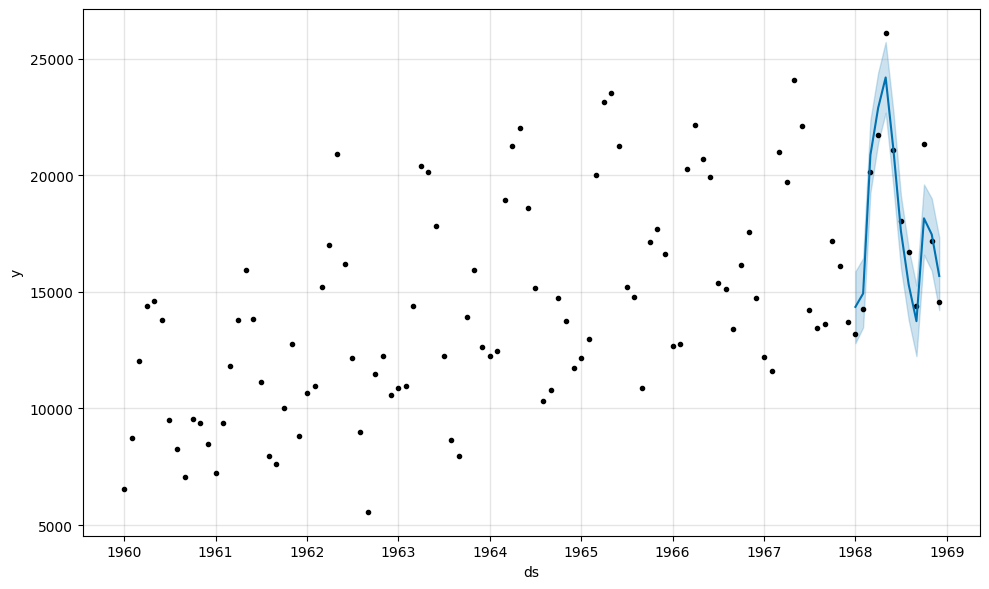

In [40]:
model.plot(forecast)
pyplot.show()

**Örnek dışı tahmin**

Model eğitilirken kullanılan verilerin dışında bir veri ile tahmin yapacağız. Öncesinde 1968 den sonraki aylar için bir veri vardı şimdi elimizde olmayan 1969 senesinden ayların tahminlerini isteyeceğiz.

In [41]:
future=list()

for i in range(1,13):
  date="1969-%02d" % i
  future.append([date])

future=pd.DataFrame(future)
future.columns=["ds"]
future["ds"]=pd.to_datetime(future["ds"])
forecast=model.predict(future)

In [42]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15395.816735,13882.105367,16963.172332
1,1969-02-01,16161.608504,14661.945899,17805.280095
2,1969-03-01,21380.483606,19837.435572,22925.467482
3,1969-04-01,23498.608574,22034.761438,25103.465000
4,1969-05-01,25007.161879,23471.732617,26590.498642


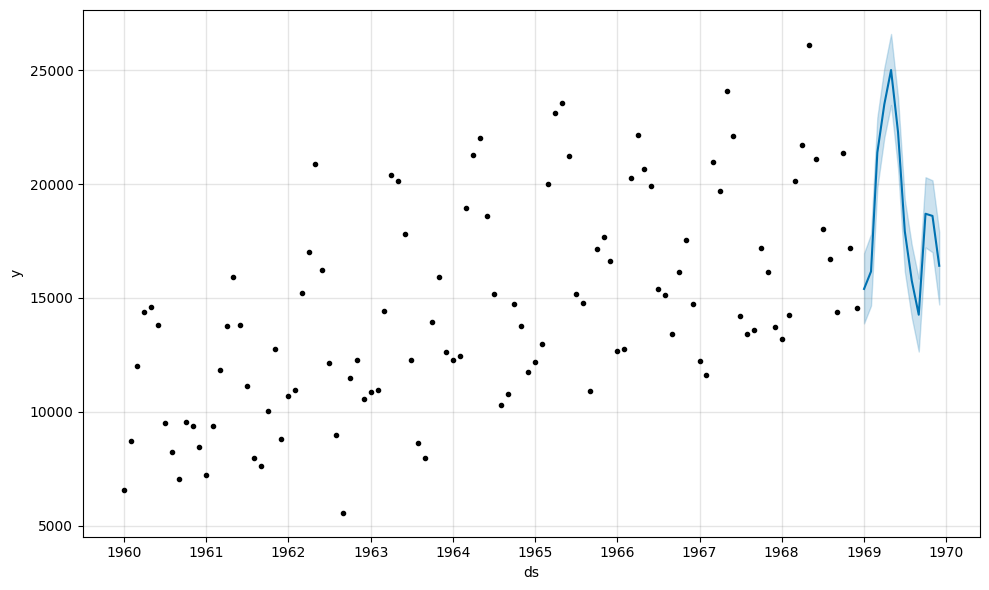

In [43]:
model.plot(forecast)
pyplot.show()

**Veri setini değiştirerek Modeli manuel değerlendirme**

Son 12 aylık veriyi kaldırarak eğitim için yeni bir DataFrame oluşturup örnek verilerle tahmin yapacağız.

In [44]:
df=pd.read_csv("/content/master_monthly-car-sales.csv")
df.columns=["ds","y"]
df["ds"]=pd.to_datetime(df["ds"])

In [45]:
train=df.drop(df.index[-12:])
train.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


>1968 yılı veriden çıktı.

In [46]:
model=Prophet()
model.fit(train) #"Train" "df" nin 1967 yılına kadar olan değerlerini içerir

future=list()

for i in range(1,13):
  date="1968-%02d" % i
  future.append([date])

future=pd.DataFrame(future)
future.columns=["ds"]
future["ds"]=pd.to_datetime(future["ds"])
forecast=model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleyas8n_/xpuxfvjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleyas8n_/ejf_m0vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53196', 'data', 'file=/tmp/tmpleyas8n_/xpuxfvjo.json', 'init=/tmp/tmpleyas8n_/ejf_m0vn.json', 'output', 'file=/tmp/tmpleyas8n_/prophet_modelb68f7dpa/prophet_model-20230914091745.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:17:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
df["y"][-12:]

96     13210
97     14251
98     20139
99     21725
100    26099
101    21084
102    18024
103    16722
104    14385
105    21342
106    17180
107    14577
Name: y, dtype: int64

>Veriden Çıkarılan değerler

In [50]:
y_true=df["y"][-12:].values
y_pred=forecast["yhat"].values

>Bu değişkene atanan değerlerin birbirine yakın olması gerekir.

>Ortalama mutlak hatanın bulunması.

In [51]:
from sklearn.metrics import mean_absolute_error

In [54]:
mae=mean_absolute_error(y_true,y_pred)
print("MAE değeri:",mae)

MAE değeri: 1336.8130229812211


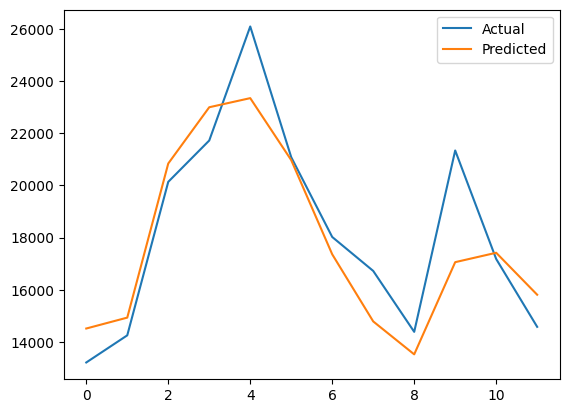

In [56]:
pyplot.plot(y_true,label="Actual")
pyplot.plot(y_pred,label="Predicted")
pyplot.legend()
pyplot.show()
